In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # 경고 메시지 무시

In [172]:
# 한글 폰트 설정
import os
os.name

# 한글 폰트 설정
import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [173]:
## 데이터 불러오기
import chardet

# 파일의 인코딩 감지
with open("C:/Users/yuzln/Desktop/농식품 구매정보 데이터 시각화/원본 파일/fruits1023.csv", 'rb') as file:
    raw_data = file.read(10000)  # 파일의 처음 10,000 바이트 읽기
    result = chardet.detect(raw_data)

    encoding = result['encoding']
    print(f"파일 인코딩: {encoding}")


# 감지된 인코딩으로 파일 읽기
df = pd.read_csv("C:/Users/yuzln/Desktop/농식품 구매정보 데이터 시각화/원본 파일/fruits1023.csv", encoding=encoding, encoding_errors='ignore')

print(df.shape)
df.head(3)

파일 인코딩: EUC-KR
(538382, 49)


,year,month,panel_code,panel_code_new,type_method,type_method_etc,type_channel_new,type_channel,type_channel_etc,shop_day,...,retail_new,shop_time,take_out,transport_pre,transport_post,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,기업형슈퍼마켓,NaN,2010-01-19,...,기업형슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,슈퍼마켓,NaN,2010-01-18,...,슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,NaN,NaN,슈퍼마켓,슈퍼마켓,NaN,2010-01-27,...,슈퍼마켓,NaN,0,NaN,NaN,0.0,0,3,40,200만원 미만


# 1. 데이터 확인

In [174]:
# 변수 기본 정보 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538382 entries, 0 to 538381
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              538382 non-null  int64  
 1   month             538382 non-null  int64  
 2   panel_code        538382 non-null  object 
 3   panel_code_new    491529 non-null  object 
 4   type_method       47699 non-null   object 
 5   type_method_etc   18 non-null      object 
 6   type_channel_new  538382 non-null  object 
 7   type_channel      530370 non-null  object 
 8   type_channel_etc  33 non-null      object 
 9   shop_day          538382 non-null  object 
 10  shop_week         538382 non-null  object 
 11  store             538353 non-null  object 
 12  store_code        35906 non-null   object 
 13  store_region      534267 non-null  object 
 14  product           538381 non-null  object 
 15  product_code      123707 non-null  object 
 16  wide              53

In [175]:
# 결측치 확인
df.isnull().sum()

year                     0
month                    0
panel_code               0
panel_code_new       46853
type_method         490683
type_method_etc     538364
type_channel_new         0
type_channel          8012
type_channel_etc    538349
shop_day                 0
shop_week                0
store                   29
store_code          502476
store_region          4115
product                  1
product_code        414675
wide                     0
middle                   0
detail                   0
country             514561
purchase                 0
discount            205117
quantity                 0
q_unit              108763
weight_quantity      14711
w_q_unit            377394
multi_quantity       36052
m_unit              425891
w_multi_quantity    457413
w_multi_unit        505121
w_q_kg              100460
w_q_kg_unit         441841
unit_cost           433162
special_diary       512901
bill                483221
bundle              502986
payment             536973
r

In [176]:
# 결측치 비율
df.isnull().sum() / len(df)

year                0.000000
month               0.000000
panel_code          0.000000
panel_code_new      0.087026
type_method         0.911403
type_method_etc     0.999967
type_channel_new    0.000000
type_channel        0.014882
type_channel_etc    0.999939
shop_day            0.000000
shop_week           0.000000
store               0.000054
store_code          0.933308
store_region        0.007643
product             0.000002
product_code        0.770224
wide                0.000000
middle              0.000000
detail              0.000000
country             0.955754
purchase            0.000000
discount            0.380988
quantity            0.000000
q_unit              0.202018
weight_quantity     0.027324
w_q_unit            0.700978
multi_quantity      0.066964
m_unit              0.791057
w_multi_quantity    0.849607
w_multi_unit        0.938220
w_q_kg              0.186596
w_q_kg_unit         0.820683
unit_cost           0.804563
special_diary       0.952671
bill          

## 1.1 결측치 처리

In [177]:
## 1. 결측치 비율이 80% 이상인 칼럼 삭제
missing_ratios = df.isnull().sum() / len(df)

# 결측치 비율이 0.8 이상인 칼럼만 선택 > 총 16개
high_missing_cols = missing_ratios[missing_ratios >= 0.8].index
print('결측치 비율이 0.8 이상인 칼럼의 개수 : %s' % len(high_missing_cols))
print('----------------------------------------')

# 해당 칼럼을 제외한 새로운 데이터프레임 생성
df = df.drop(columns = high_missing_cols)

# 결과 출력 > from 49 cols to 33 cols
print(df.shape)
df.head(3)

결측치 비율이 0.8 이상인 칼럼의 개수 : 16
----------------------------------------
(538382, 33)


,year,month,panel_code,panel_code_new,type_channel_new,type_channel,shop_day,shop_week,store,store_region,...,w_q_kg,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,PN00000001,A20000001,슈퍼마켓,기업형슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
1,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-18,2,소형슈퍼마켓,경기,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
2,2010,1,PN00000001,A20000001,슈퍼마켓,슈퍼마켓,2010-01-27,4,소형슈퍼마켓,경기,...,5,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만


In [178]:
## 2. 의미없는 데이터 적재 칼럼 삭제
cols = ['panel_code', 'panel_code_new', 'type_channel', 'product_code']

# 해당 칼럼을 제외한 새로운 데이터프레임 생성
df = df.drop(columns = cols)

# 결과 출력 > from 33 cols to 29 cols
print(df.shape)
df.head(3)

(538382, 29)


,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,...,w_q_kg,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2
0,2010,1,슈퍼마켓,2010-01-19,3,하나로클럽고양점,경기,배친환경_,과일류,배,...,.,3슈퍼마켓,기업형슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
1,2010,1,슈퍼마켓,2010-01-18,2,소형슈퍼마켓,경기,바나나필리핀,과일류,바나나,...,.,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만
2,2010,1,슈퍼마켓,2010-01-27,4,소형슈퍼마켓,경기,귤,과일류,감귤,...,5,3슈퍼마켓,슈퍼마켓,NaN,0,0.0,0,3,40,200만원 미만


# 2. 변수 확인

## year / month : 연도 / 월

In [179]:
# year
print('unique한 year 개수 : ', len(df['year'].unique()))
df['year'].unique()

unique한 year 개수 :  14


array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023], dtype=int64)

In [180]:
# month
print('unique한 month 개수 : ', len(df['month'].unique()))
df['month'].unique()

unique한 month 개수 :  12


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [181]:
# 데이터 범위
start = df['year'].min()
end = df['year'].max()

print('판매 시작 year-month : %s 년 %s 월' % (start, df[df['year'] == start]['month'].min()))
print('판매 종료 year-month : %s 년 %s 월' % (end, df[df['year'] == end]['month'].max()))

판매 시작 year-month : 2010 년 1 월
판매 종료 year-month : 2023 년 12 월


In [182]:
# 연도/월별 판매 수량 > 모든 year/month에 판매
pd.pivot_table(df
               , index = 'year'
               , columns = 'month'
               , aggfunc = 'size'
               , fill_value = 0)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,3713,3217,3745,3576,3116,2467,3075,4223,3773,4345,4000,3511
2011,3593,2593,3192,3077,2612,2257,2977,4274,3643,4359,3714,3369
2012,3272,2844,3299,2956,2368,2163,3131,4315,3982,3574,3556,2931
2013,3075,2458,3005,2801,2020,2087,2742,3953,3340,3700,3233,2746
2014,3206,2091,2977,2972,2310,2376,3145,3868,3213,3866,3233,3072
2015,3646,3082,3274,3545,3033,2931,3457,4361,4154,4342,3763,3727
2016,3734,2926,3244,3252,2790,2994,3715,4316,3801,4302,3718,3582
2017,3521,2593,3278,3247,2865,2749,3677,4383,4046,3620,3436,3100
2018,2796,2464,2795,2929,2450,2651,3061,3477,3326,3451,3134,2862


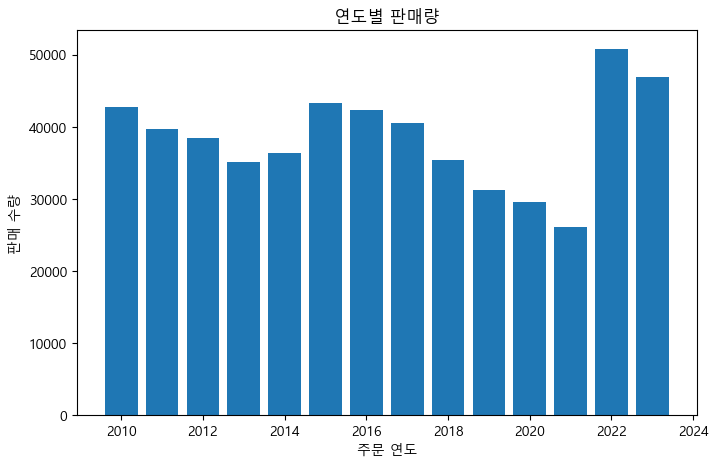

In [183]:
## 연도별 판매량 시각화
sales_by_year = df['year'].value_counts().sort_index().copy()

# fig : 그래프의 빈 도면, 여기에 그래프의 모든 내용이 그려짐
# ax : 실제로 그래프와 plot을 그리는 데 사용되는 영역
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(sales_by_year.index, sales_by_year.values)
ax.set_xlabel('주문 연도')
ax.set_ylabel('판매 수량')

plt.title('연도별 판매량')
plt.show()

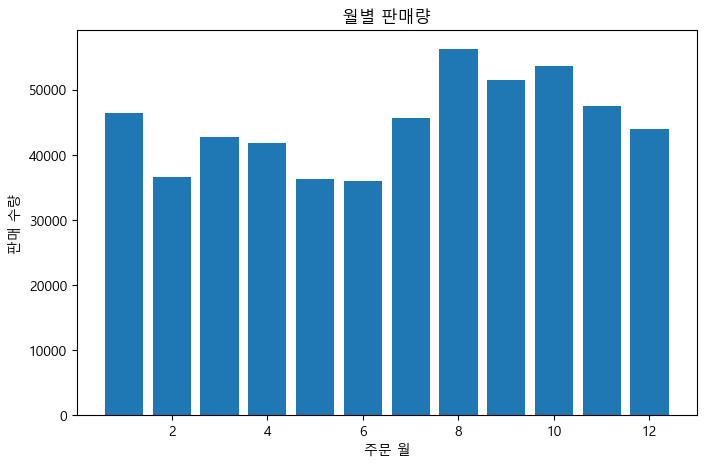

In [184]:
## 월별 판매량 시각화
sales_by_month = df['month'].value_counts().sort_index().copy()

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(sales_by_month.index, sales_by_month.values)
ax.set_xlabel('주문 월')
ax.set_ylabel('판매 수량')

plt.title('월별 판매량')
plt.show()

## type_channel_new : 구매 장소

In [185]:
print('unique한 type_cannel_new 개수 : ', len(df['type_channel_new'].unique()))
df['type_channel_new'].unique()

unique한 type_cannel_new 개수 :  13


array(['슈퍼마켓', '대형마트', '백화점', '전통시장', '무점포', '기타', '온라인몰', '전문점', '편의점',
       '농가직거래', '정육점', '홈쇼핑', '외식업체'], dtype=object)

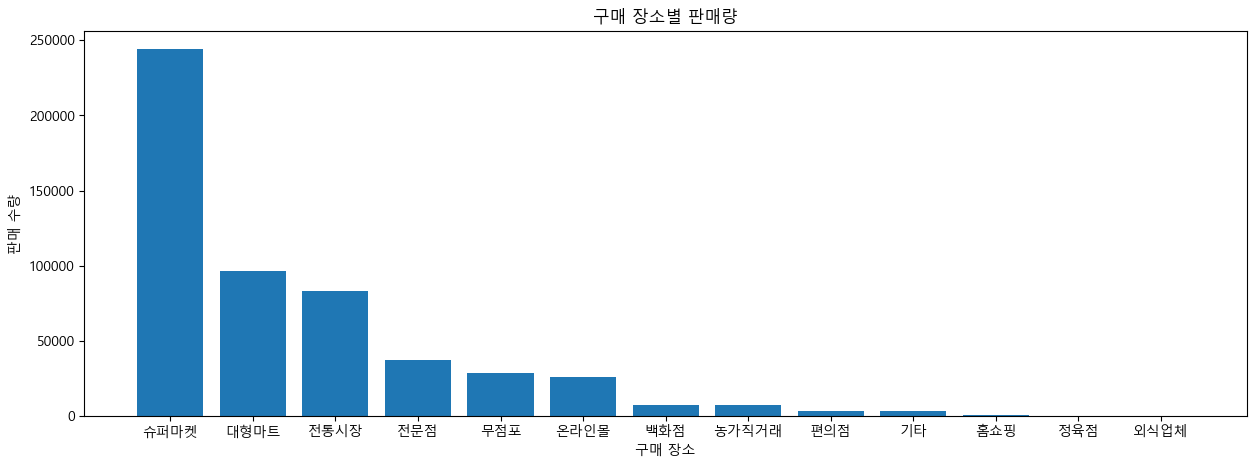

In [186]:
## 구매장소별 판매량 시각화
sales_by_channel = df['type_channel_new'].value_counts().sort_values(ascending=False).copy()

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_channel.index, sales_by_channel.values)
ax.set_xlabel('구매 장소')
ax.set_ylabel('판매 수량')

plt.title('구매 장소별 판매량')
plt.show()

## shop_day : 구입일

In [187]:
df['shop_day'].value_counts().head()

shop_day
2022-09-09    328
2022-08-27    283
2018-09-22    272
2015-09-26    270
2022-09-08    260
Name: count, dtype: int64

In [188]:
# datetime형 변환 
df['shop_day'] = pd.to_datetime(df['shop_day'])
df['shop_day'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 538382 entries, 0 to 538381
Series name: shop_day
Non-Null Count   Dtype         
--------------   -----         
538382 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.1 MB


In [189]:
# day 칼럼 생성
df['day'] = df['shop_day'].dt.day

# 확인
df[['shop_day', 'year', 'month', 'day']].tail(7)

,shop_day,year,month,day
538375,2023-12-10,2023,12,10
538376,2023-12-16,2023,12,16
538377,2023-12-16,2023,12,16
538378,2023-12-18,2023,12,18
538379,2023-12-21,2023,12,21
538380,2023-12-21,2023,12,21
538381,2023-12-25,2023,12,25


## shop_week : 구입 요일

In [190]:
print('unique한 shop_week 개수 : ', len(df['shop_week'].unique()))
df['shop_week'].unique()

unique한 shop_week 개수 :  15


array([3, 2, 4, 6, 7, 1, 5, '2', '7', '1', '3', '6', '5', '4', '.'],
      dtype=object)

In [191]:
# shop_week이 '.'인 데이터의 shop_day
df[df['shop_week'] == '.']

,year,month,type_channel_new,shop_day,shop_week,store,store_region,product,wide,middle,...,retail_8,retail_new,shop_time,take_out,panel_type,edit,family_num_level,age1_group,income_v2,day
381954,2019,11,슈퍼마켓,2019-11-23,.,공단소비자마트,인천,사과_국내산_,과일류,사과,...,3슈퍼마켓,슈퍼마켓,1,0,0.0,0,3,30,600~699만원,23


In [192]:
## shop_day가 동일한 행에서 shop_week의 최빈값으로 '.' 값을 대체

# shop_week이 '.'인 데이터의 shop_day
change_week = df[df['shop_week'] == '.']['shop_day'].tolist()

# shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함)
print("shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함) : "
      , df[df['shop_day'].isin(change_week)]['shop_week'].unique().tolist())
print('-------------------------------------------------------')


for i in df[df['shop_week'] == '.'].index :
    shop_day_value = df.loc[i, 'shop_day']

    # shop_day가 같은 행들의 shop_week 값 가져오기
    same_day_weeks = df[df['shop_day'] == shop_day_value]['shop_week']

    # 최빈값 값 계산 (단, '.' 제외) > int와 obj형이 혼합되어 있으므로 최빈값으로 계산
    mode_value = same_day_weeks[same_day_weeks != '.'].mode()[0]

    # '.'을 유니크한 값으로 대체
    df.loc[i, 'shop_week'] = mode_value 


# 확인
print("shop_week이 '.'였던 데이터의 shop_day의 shop_week : "
      , df[df['shop_day'].isin(change_week)]['shop_week'].unique().tolist())

shop_week이 '.'인 데이터의 shop_day의 shop_week ('.' 포함) :  ['7', '.']
-------------------------------------------------------
shop_week이 '.'였던 데이터의 shop_day의 shop_week :  ['7']


In [193]:
df['shop_week'].unique()

array([3, 2, 4, 6, 7, 1, 5, '2', '7', '1', '3', '6', '5', '4'],
      dtype=object)

In [194]:
## 요일명 변경

# 문자열 정수형으로 변환
df['shop_week'] = df['shop_week'].astype(int)

# 숫자를 요일로 매핑
week_map = {1 : '일요일'
            , 2 : '월요일'
            , 3 : '화요일'
            , 4 : '수요일'
            , 5 : '목요일'
            , 6 : '금요일'
            , 7 : '토요일'}

df['shop_week'] = df['shop_week'].map(week_map)

# 확인
print('unique한 shop_week 개수 : ', len(df['shop_week'].unique()))
df['shop_week'].unique()

unique한 shop_week 개수 :  7


array(['화요일', '월요일', '수요일', '금요일', '토요일', '일요일', '목요일'], dtype=object)

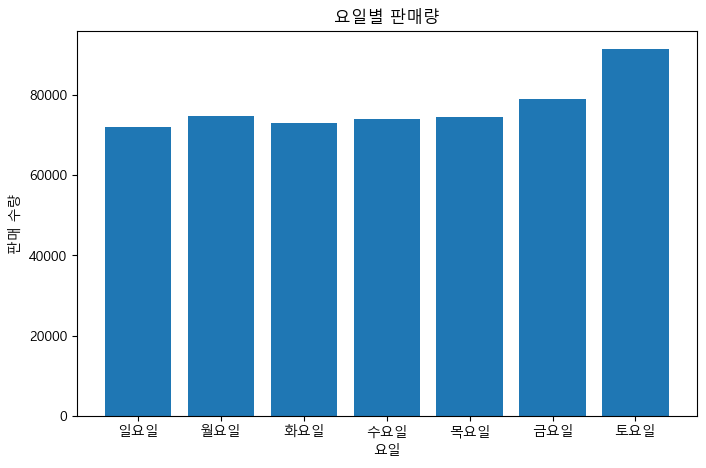

In [195]:
## 요일별 판매량 시각화

# 요일 순서 정의
week_order = ['일요일', '월요일', '화요일', '수요일', '목요일', '금요일', '토요일']

sales_by_week = pd.Categorical(df['shop_week'], categories=week_order, ordered=True).value_counts()

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(sales_by_week.index, sales_by_week.values)
ax.set_xlabel('요일')
ax.set_ylabel('판매 수량')

plt.title('요일별 판매량')
plt.show()

## store : 상점명

In [205]:
print('unique한 store 개수 : ', len(df['store'].unique()))
df['store'].unique()

unique한 store 개수 :  24340


array(['하나로클럽고양점', '소형슈퍼마켓', '이마트일산점', ..., '남촌농산물도매시장인농254또맛나상회',
       'GSTHEFRESH연수점', '무점포이레유통'], dtype=object)

In [197]:
df['store'].value_counts()

store
소형슈퍼마켓            60792
재래시장              40018
대형슈퍼마켓            27627
없음                16524
전문점               15250
                  ...  
관우농장                  1
장보남몰옥션                1
인천모래내시장오빠네과일야채        1
드림홈마트(도화점)            1
무점포이레유통               1
Name: count, Length: 24339, dtype: int64

## store_region : 구매 지역

In [206]:
print('unique한 store_region 개수 : ', len(df['store_region'].unique()))
df['store_region'].unique()

unique한 store_region 개수 :  20


array(['경기', '없음', '서울', '인천', '전남', '강원', '제주', '광주', '대전', '충남', '경북',
       '경남', '부산', '전북', '충북', '세종', '대구', '울산', '기타', nan], dtype=object)

In [199]:
# null 개수 및 비율
print('null 개수 : %s' % df['store_region'].isnull().sum())

ratio = df['store_region'].isnull().sum() / len(df)
print('null 비율 : %s' % ratio)

null 개수 : 4115
null 비율 : 0.007643271877588775


In [200]:
# store_region이 null값인 데이터 확인
print('store_region이 null값인 데이터 중 store 빈도수 Top10 : '
      , df[df['store_region'].isna()]['store'].value_counts().sort_values(ascending=False).head(10).index.tolist())

store_region이 null값인 데이터 중 store 빈도수 Top10 :  ['마켓컬리', '쿠팡', '무점포', '없음없음', '오아시스', '이마트몰', '쿠팡로켓프레시', '오아시스마켓', '11번가이마트몰', 'SSG.COM이마트몰']


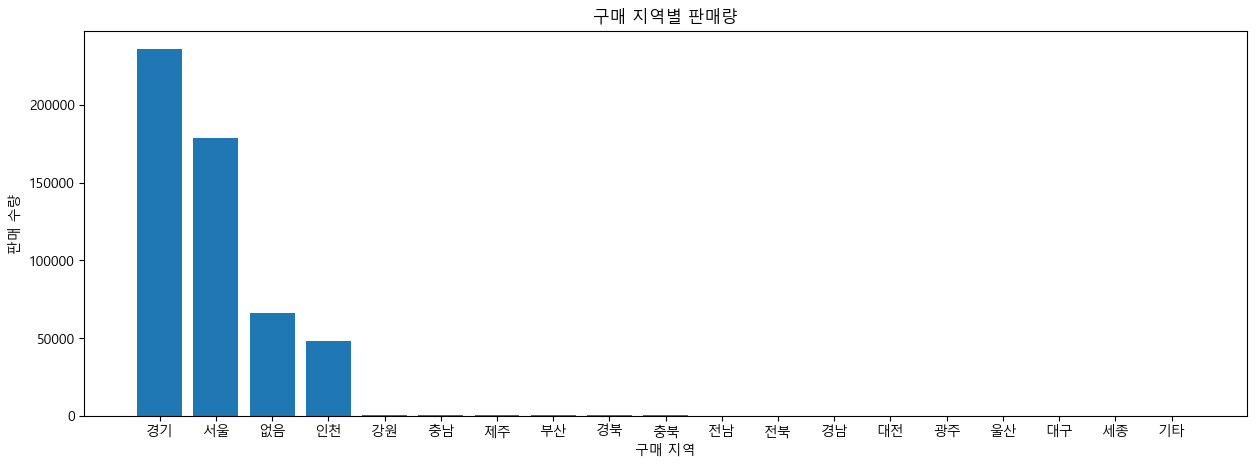

In [201]:
## 구매 지역별 시각화 
sales_by_region = df['store_region'].value_counts().sort_values(ascending=False).copy()

fix, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_region.index, sales_by_region.values)
ax.set_xlabel('구매 지역')
ax.set_ylabel('판매 수량')

plt.title('구매 지역별 판매량')
plt.show()

In [207]:
# 지역별 판매 비율
df['store_region'].value_counts(normalize=True).head(7)

store_region
경기    0.440903
서울    0.334224
없음    0.124054
인천    0.090769
강원    0.001827
충남    0.001361
제주    0.001314
Name: proportion, dtype: float64

In [203]:
# store_region이 '없음'인 데이터 확인
print("store_region이 '없음'인 데이터 중 store 빈도수 Top10 : "
      , df[df['store_region'] == '없음']['store'].value_counts().sort_values(ascending=False).head(10).index.tolist())

store_region이 '없음'인 데이터 중 store 빈도수 Top10 :  ['없음', '노점', '산지직거래', '쿠팡', '기타', '마켓컬리', '농가직거래(방문,기타)', '인터넷구매', '이마트몰', '재래시장']


## product : 상품명

In [208]:
print('unique한 product 개수 : ', len(df['product'].unique()))
df['product'].unique()

unique한 product 개수 :  44025


array(['배친환경_', '바나나필리핀', '귤', ..., '조생귤_M_국산', '조생귤_L_국산', '스위트마운틴_수입'],
      dtype=object)

In [209]:
df['product'].value_counts()

product
바나나           41891
사과            36443
귤             19383
단감            14464
복숭아           11305
              ...  
스텔라벨라청포도팩         1
진영단감_극조생감귤        1
가을햇사과             1
GAP감홍사과           1
스위트마운틴_수입         1
Name: count, Length: 44024, dtype: int64

## wide : 대분류

In [212]:
print('unique한 wide 개수 : ', len(df['wide'].unique()))
df['wide'].unique()

unique한 wide 개수 :  1


array(['과일류'], dtype=object)

## middle : 중분류

In [214]:
print('unique한 middle 개수 : ', len(df['middle'].unique()))
df['middle'].unique()

unique한 middle 개수 :  19


array(['배', '바나나', '감귤', '사과', '단감', '레몬', '떫은감', '오렌지', '참다래', '기타과일',
       '복숭아', '열대과일', '파인애플', '포도', '베리', '체리', '묶음과일', '매실', '자두'],
      dtype=object)

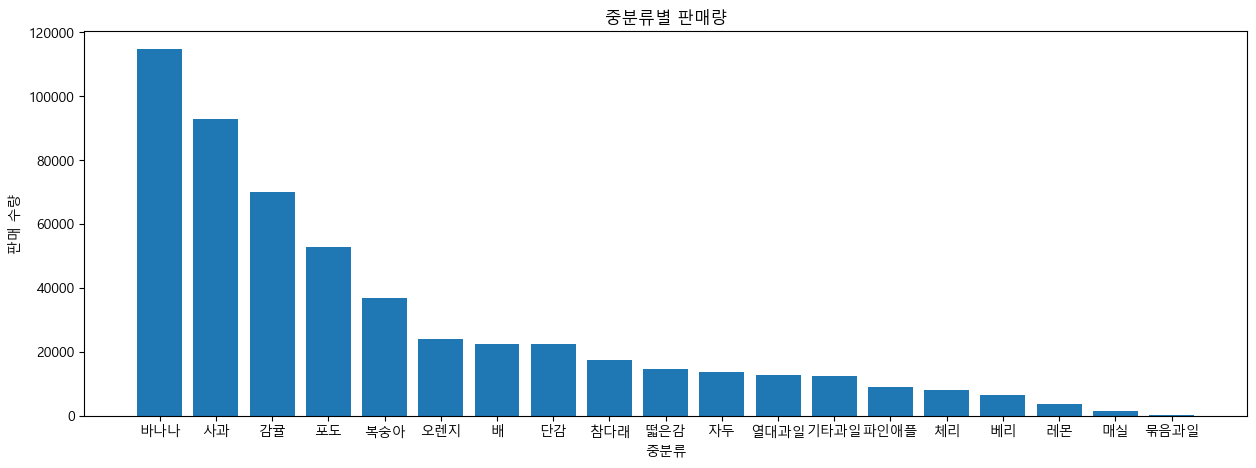

In [215]:
## 중분류별 시각화 
sales_by_middle = df['middle'].value_counts().sort_values(ascending=False).copy()

fix, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_middle.index, sales_by_middle.values)
ax.set_xlabel('중분류')
ax.set_ylabel('판매 수량')

plt.title('중분류별 판매량')
plt.show()

## detail : 소분류

In [216]:
print('unique한 detail 개수 : ', len(df['detail'].unique()))
df['detail'].unique()

unique한 detail 개수 :  59


array(['기타배', '일반바나나', '밀감', '기타사과', '단감', '레몬', '후지', '신고배', '일반떫은감',
       '대봉시', '오렌지', '홍시', '그린키위', '기타과일', '천도', '기타키위', '자몽', '골드키위',
       '파인애플', '대봉', '한라봉', '기타바나나', '석류', '기타포도', '캠벨얼리', '유자', '기타감귤',
       '청견', '세리단', '금귤', '복분자', '기타열대과일', '황도', '적포도', '기타베리', '블루베리',
       '체리', '청포도', '망고', '거봉', '무화과', '묶음과일', '머루포도_MBA_', '매실', '홍로',
       '혼합과일', '델라웨어', '자두', '일반복숭아', '오디', '아오리', '백도', '홍옥', '킹델라웨어',
       '반시', '모과', '기타복숭아', '기타감', '올리브'], dtype=object)

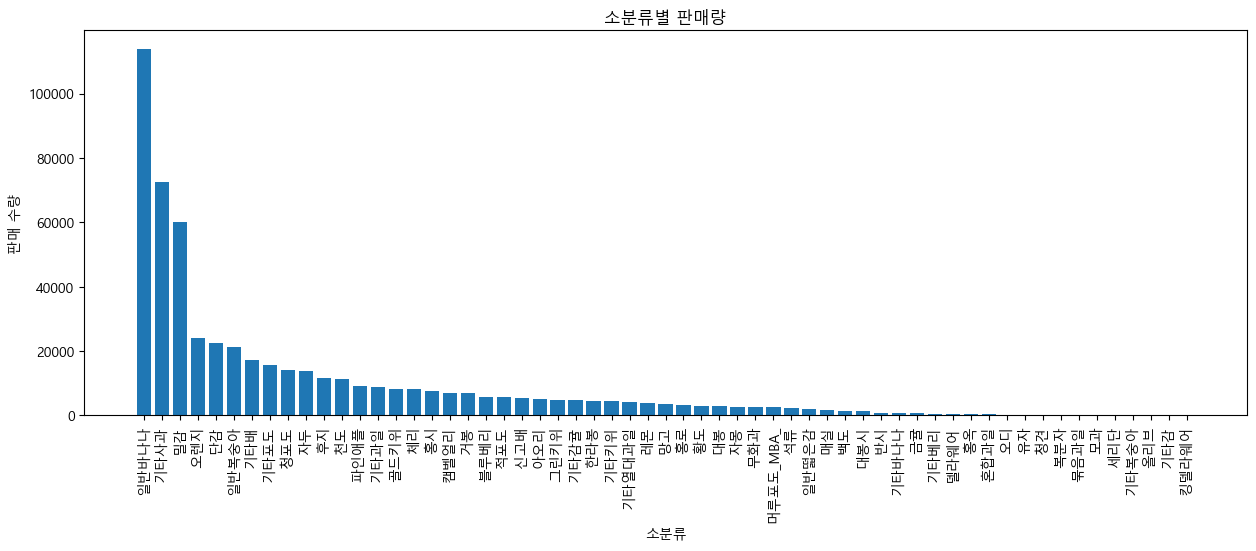

In [220]:
## 소분류별 시각화 
sales_by_detail = df['detail'].value_counts().sort_values(ascending=False).copy()

fix, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_detail.index, sales_by_detail.values)
ax.set_xlabel('소분류')
ax.set_ylabel('판매 수량')

plt.title('소분류별 판매량')
plt.xticks(rotation=90)
plt.show()

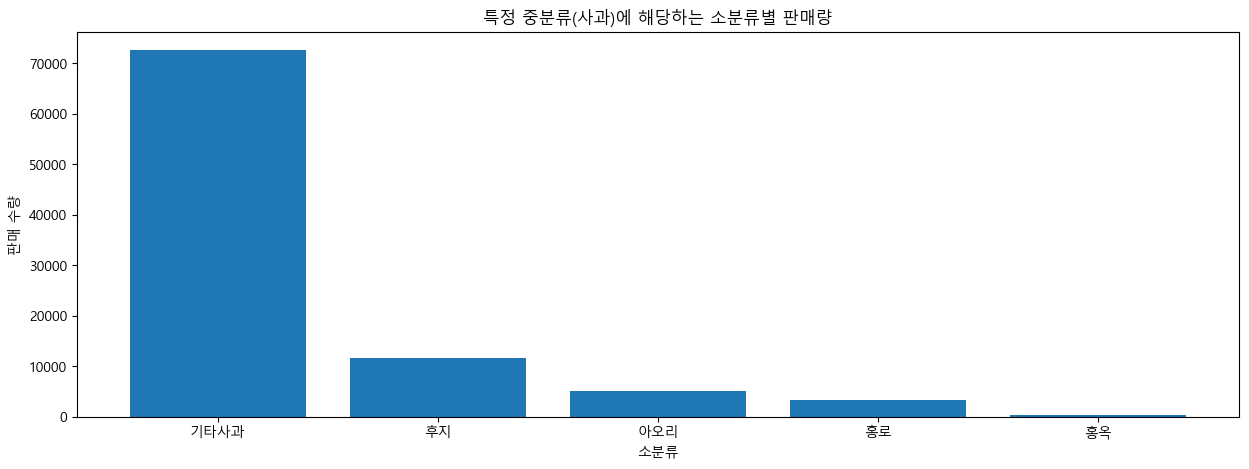

In [223]:
## 특정 중분류(사과)에 해당하는 소분류 시각화 
sales_by_middle_detail = df[df['middle'] == '사과']['detail'].value_counts().sort_values(ascending=False).copy()

fix, ax = plt.subplots(figsize=(15, 5))

ax.bar(sales_by_middle_detail.index, sales_by_middle_detail.values)
ax.set_xlabel('소분류')
ax.set_ylabel('판매 수량')

plt.title('특정 중분류(사과)에 해당하는 소분류별 판매량')
plt.show()

## purchase : 구입액